In [1]:
# %%
# 1. SETUP
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import geopandas as gpd
import glob

DATA_PROCESSED = os.path.join("..", "data", "processed")

/Users/zhenyuyue/miniforge3/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# %%
# 2. LOAD & INSPECT DATA
print("📂 Loading Processed & Raw Data...")

# A. Enriched Tract Data (The Canvas)
tract_path = os.path.join(DATA_PROCESSED, "df_tract_enriched.csv")
if os.path.exists(tract_path):
    df_tract = pd.read_csv(tract_path, dtype={'GEOID':str, 'PUMA':str, 'GEOID_COUNTY':str})
    print(f"✅ Tracts Loaded: {df_tract.shape}")
    print("   Sample (First 10 Rows):")
    display(df_tract.head(10))
else:
    print(f"❌ Missing: {tract_path}")

# B. Enriched Person Data (The Training Set)
person_path = os.path.join(DATA_PROCESSED, "df_person_enriched.csv")
if os.path.exists(person_path):
    df_person = pd.read_csv(person_path, dtype={'PUMA':str})
    print(f"\n✅ People Loaded: {df_person.shape}")
    print("   Sample (First 10 Rows):")
    display(df_person.head(10))
else:
    print(f"❌ Missing: {person_path}")

# C. County Level Data (SNAP & SAIPE)
# We need to reload this from Raw to get the ground truth for the map
county_path = os.path.join("..", "data", "raw", "snap_county_data_clean.csv")
if os.path.exists(county_path):
    df_county = pd.read_csv(county_path, dtype={'fips':str})
    # Clean FIPS (Clean up the messy string if needed, or just pad it)
    # Assuming the pipeline cleaned it or we clean it here for safety:
    df_county['GEOID_COUNTY'] = df_county['fips'].astype(str).str.strip().str[:5].str.zfill(5)
    print(f"\n✅ County Data Loaded: {df_county.shape}")
    print("   Sample (First 10 Rows):")
    display(df_county.head(10))
else:
    print(f"❌ Missing: {county_path}")

# D. Crosswalk Source (The Bridge)
# Since the pipeline uses the raw relationship file, let's inspect that source.
crosswalk_path = os.path.join("..", "data", "raw", "2020_Census_Tract_to_2020_PUMA.csv")
if os.path.exists(crosswalk_path):
    df_crosswalk_source = pd.read_csv(crosswalk_path, dtype=str)
    print(f"\n✅ Crosswalk Source Loaded: {df_crosswalk_source.shape}")
    print("   Sample (First 10 Rows):")
    display(df_crosswalk_source.head(10))
else:
    print(f"❌ Missing: {crosswalk_path}")

📂 Loading Processed & Raw Data...
✅ Tracts Loaded: (3879, 60)
   Sample (First 10 Rows):


,GEOID,GEOID_COUNTY,PUMA,local_snap_claim_rate,total_population,poverty_count_est,poverty_count_moe,m_00_04,m_05_09,m_10_14,...,f_75_79,f_80_84,f_85_plus,race_white,race_black,race_native,race_asian,race_pacific,race_other,race_two_more
0,24001000100,24001,00101,0.068867,3153,297,162,88,130,13,...,87,13,19,3098,21,0,0,0,0,34
1,24001000200,24001,00101,0.068867,4094,364,246,82,64,83,...,20,112,30,3203,753,6,15,0,0,117
2,24001000500,24001,00101,0.068867,2269,528,199,0,104,70,...,41,15,56,1706,334,0,8,0,37,184
3,24001000600,24001,00101,0.068867,2829,366,159,66,43,164,...,33,87,112,2548,66,7,0,0,21,187
4,24001000700,24001,00101,0.068867,3377,1136,463,86,52,207,...,42,101,102,3156,40,0,0,0,57,124
5,24001000800,24001,00101,0.068867,1972,703,205,121,79,30,...,62,9,11,1797,34,16,12,0,0,113
6,24001001000,24001,00101,0.068867,1859,696,201,64,30,16,...,38,123,9,1487,250,0,0,0,0,122
7,24001001100,24001,00101,0.068867,1423,269,78,15,32,82,...,25,29,92,1267,34,0,18,0,9,95
8,24001001200,24001,00101,0.068867,2950,190,120,38,81,28,...,131,56,88,2768,19,6,58,0,0,99
9,24001001300,24001,00101,0.068867,5030,245,115,8,48,10,...,45,12,35,2607,2108,34,32,0,0,249



✅ People Loaded: (150723, 7)
   Sample (First 10 Rows):


,is_poor,Person_Weight,Age,Sex_Code,Race_Code,PUMA,local_snap_claim_rate
0,1,30,75,1,2,00104,0.086560
1,1,11,55,1,2,00101,0.068867
2,0,23,50,1,1,00102,0.086560
3,0,23,53,1,1,00102,0.086560
4,1,192,56,1,2,00103,0.086560
5,1,53,27,1,1,00102,0.086560
6,0,15,51,1,2,00104,0.086560
7,1,20,59,1,2,00103,0.086560
8,0,17,61,1,1,00101,0.068867
9,0,10,44,1,1,00101,0.068867



✅ County Data Loaded: (149, 4)
   Sample (First 10 Rows):


,fips,county_name,snap_persons_total,GEOID_COUNTY
0,1100161 DC FSP D.C. Treasury,35021,58175.0,11001
1,2400101 MD FSP ALLEGANY CO SOC SVCS,3565,7637.0,24001
2,2400301 MD FSP ANNE ARUNDEL CO SOC SV,5878,10044.0,24003
3,2400501 MD FSP BALTIMORE CO SOC SVCS,10781,15539.0,24005
4,2400901 MD FSP CALVERT CO SOC SVCS,944,1710.0,24009
5,2401101 MD FSP CAROLINE CO SOC SVCS,644,1224.0,24011
6,2401301 MD FSP CARROLL COUNTY SOC SVC,849,1965.0,24013
7,2401501 MD FSP CECIL CO SOC SVCS,1538,3182.0,24015
8,2401701 MD FSP CHARLES CO SOC SVCS,2414,4291.0,24017
9,2401901 MD FSP DORCHESTER CO SOC SVCS,1427,2235.0,24019



✅ Crosswalk Source Loaded: (85452, 4)
   Sample (First 10 Rows):


,STATEFP,COUNTYFP,TRACTCE,PUMA5CE
0,01,001,020100,01700
1,01,001,020200,01700
2,01,001,020300,01700
3,01,001,020400,01700
4,01,001,020501,01700
5,01,001,020502,01700
6,01,001,020503,01700
7,01,001,020600,01700
8,01,001,020700,01700
9,01,001,020801,01700


🔍 Inspecting the new 'local_snap_claim_rate' feature...


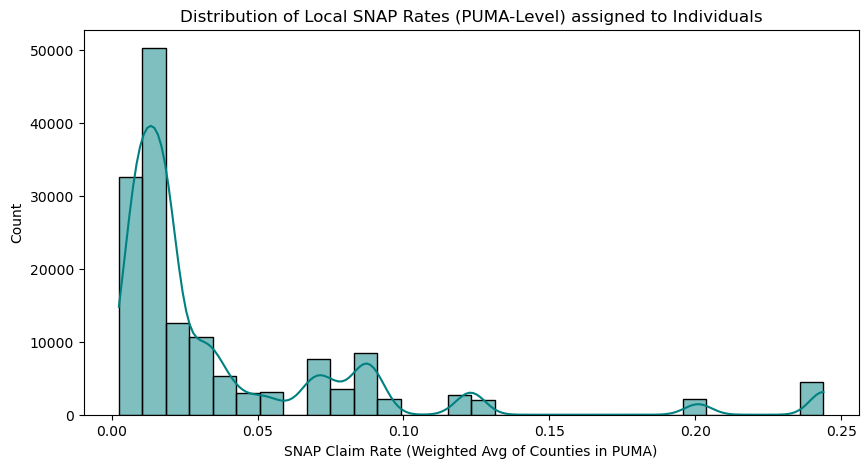

In [3]:
# %%
# 3. INSPECT NEW FEATURES
print("🔍 Inspecting the new 'local_snap_claim_rate' feature...")

# Check distribution of SNAP rates assigned to people
plt.figure(figsize=(10, 5))
sns.histplot(df_person['local_snap_claim_rate'], bins=30, kde=True, color='teal')
plt.title("Distribution of Local SNAP Rates (PUMA-Level) assigned to Individuals")
plt.xlabel("SNAP Claim Rate (Weighted Avg of Counties in PUMA)")
plt.show()

📊 Analyzing Demographics vs Poverty...


/var/folders/0s/d2ycgfq576zdm73qwlf4r6gc0000gn/T/ipykernel_90349/1628257501.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=grp_race.index, y=grp_race.values, palette='magma')


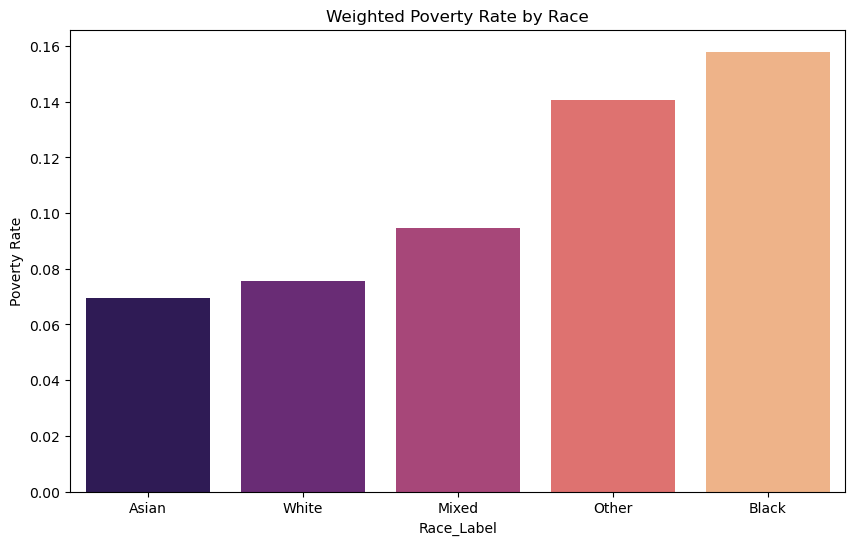

In [4]:
# %%
# 4. PERSON-LEVEL ANALYSIS (Demographics)
# (Same code as your previous explore notebook, but using df_person)
print("📊 Analyzing Demographics vs Poverty...")

df_viz = df_person.copy()
# Simple Race Map
race_map = {1: 'White', 2: 'Black', 6: 'Asian', 8: 'Other', 9: 'Mixed'}
df_viz['Race_Label'] = df_viz['Race_Code'].map(race_map).fillna('Other')

# Weighted Poverty Rate by Race
grp_race = df_viz.groupby('Race_Label').apply(
    lambda x: x.loc[x['is_poor']==1, 'Person_Weight'].sum() / x['Person_Weight'].sum()
).sort_values()

plt.figure(figsize=(10, 6))
sns.barplot(x=grp_race.index, y=grp_race.values, palette='magma')
plt.title("Weighted Poverty Rate by Race")
plt.ylabel("Poverty Rate")
plt.show()

In [5]:
# %%
# --- STEP 5: ANCHOR VALIDATION (COUNTY LEVEL) ---
# Goal: Compare USDA SNAP (Reality) vs Census SAIPE (Modeled Estimate).
from scipy.stats import pearsonr

def analyze_county_anchors():
    print("⚖️ Validating County Anchors...")
    
    # We use df_county which has both SNAP and SAIPE
    if 'saipe_poverty_est' not in df_county.columns:
        print("⚠️ SAIPE data missing. Skipping comparison.")
        return

    # Correlation
    x = df_county['saipe_poverty_est']
    y = df_county['snap_persons_total']
    corr, _ = pearsonr(x, y)
    
    plt.figure(figsize=(8, 8))
    sns.scatterplot(data=df_county, x='saipe_poverty_est', y='snap_persons_total', 
                    s=100, alpha=0.7, edgecolor='k')
    
    # Reference Line (x=y)
    max_val = max(x.max(), y.max())
    plt.plot([0, max_val], [0, max_val], 'r--', label='Perfect Agreement (1:1)')
    
    plt.title(f"Ground Truth Check: SNAP vs SAIPE\nCorrelation: {corr:.3f}")
    plt.xlabel("Census SAIPE Poverty Estimate")
    plt.ylabel("USDA SNAP Recipients")
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

analyze_county_anchors()

⚖️ Validating County Anchors...
⚠️ SAIPE data missing. Skipping comparison.


✅ County Data Loaded: (149, 13) rows
🗺️ Generating Maps (Vertical Stack + Unified Scale)...
   🎨 Unified Color Scale Max: 82.8%


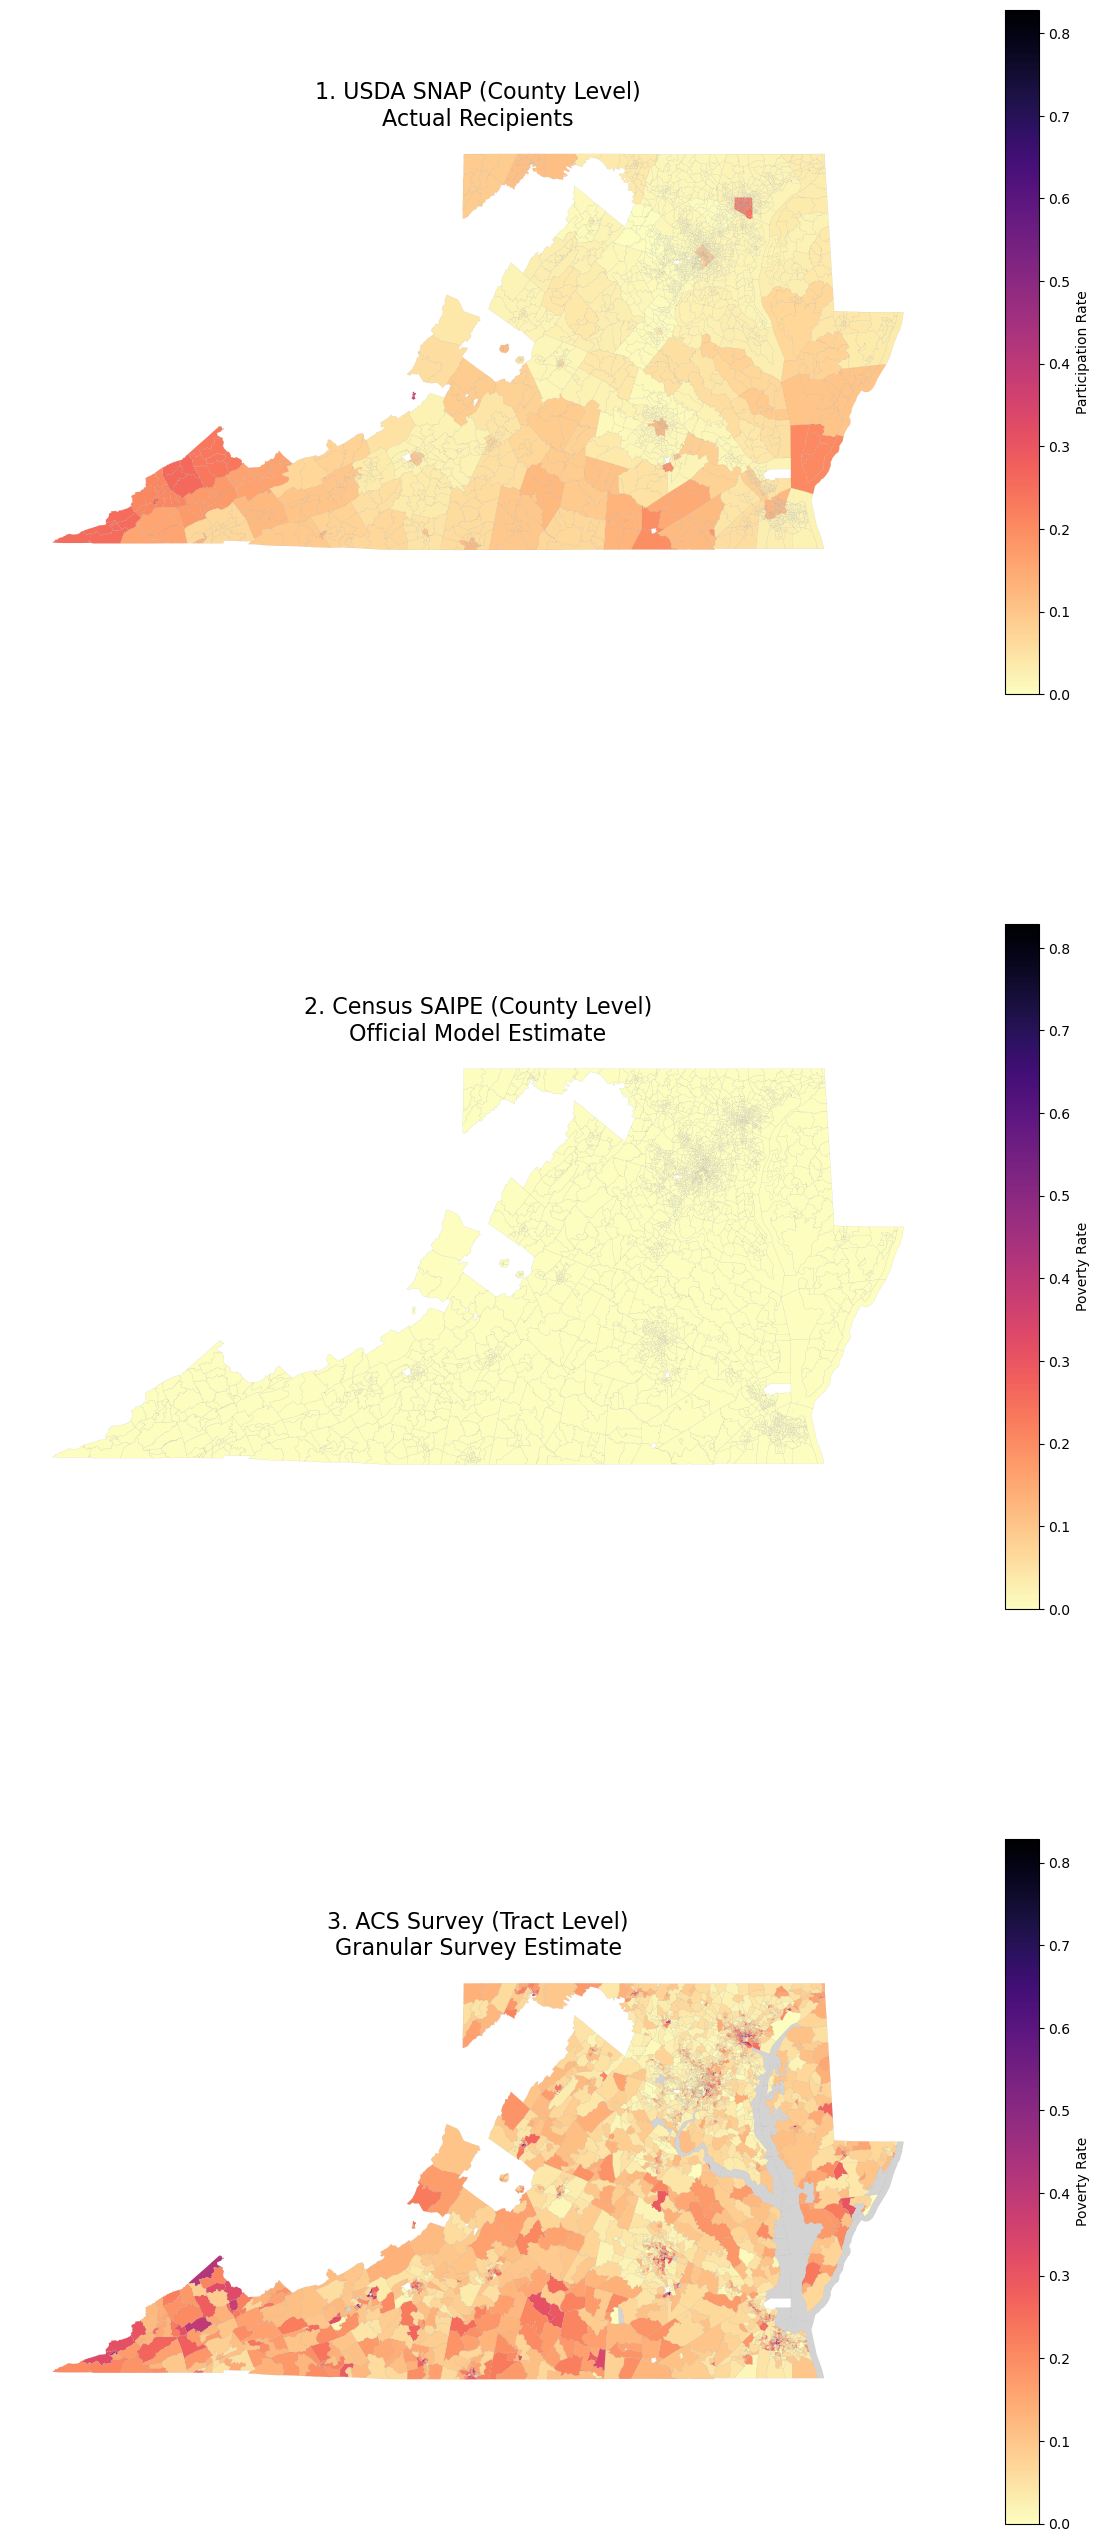

In [6]:
snap_path = os.path.join("..", "data", "raw", "snap_county_data_clean.csv")

if os.path.exists(snap_path):
    df_county = pd.read_csv(snap_path, dtype={'fips':str})
    
    # Clean FIPS to match our standard (5 digits)
    df_county['GEOID_COUNTY'] = df_county['fips'].astype(str).str.strip().str[:5].str.zfill(5)
    
    # Optional: Load SAIPE if you have it, otherwise just use SNAP
    saipe_files = glob.glob(os.path.join("..", "data", "raw", "*saipe*.csv"))
    if saipe_files:
        df_saipe = pd.read_csv(saipe_files[0])
        # Ensure SAIPE has a matching GEOID key if you want to merge it
        # (Assuming standard column names, adjust if your saipe file differs)
        if 'state_fips' in df_saipe.columns and 'county_fips' in df_saipe.columns:
             df_saipe['GEOID_COUNTY'] = df_saipe['state_fips'].astype(str).str.zfill(2) + \
                                        df_saipe['county_fips'].astype(str).str.zfill(3)
             df_county = df_county.merge(df_saipe, on='GEOID_COUNTY', how='left')
    
    print(f"✅ County Data Loaded: {df_county.shape} rows")
else:
    print(f"❌ Missing SNAP data at {snap_path}")

# %%
# --- STEP 6: GIS VISUALIZATION (VERTICAL & UNIFIED SCALE) ---
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import os

def plot_refactored_map():
    print("🗺️ Generating Maps (Vertical Stack + Unified Scale)...")
    
    # 1. LOAD SHAPEFILES
    # Note: Ensure you have internet access or these files exist locally
    urls = [
        "https://www2.census.gov/geo/tiger/TIGER2023/TRACT/tl_2023_11_tract.zip",
        "https://www2.census.gov/geo/tiger/TIGER2023/TRACT/tl_2023_24_tract.zip",
        "https://www2.census.gov/geo/tiger/TIGER2023/TRACT/tl_2023_51_tract.zip"
    ]
    
    gdf_list = []
    for url in urls:
        try:
            filename = os.path.basename(url)
            if os.path.exists(filename):
                gdf_list.append(gpd.read_file(filename))
            else:
                gdf_list.append(gpd.read_file(url))
        except:
            pass 

    if not gdf_list:
        print("❌ Shapefile download failed.")
        return

    gdf = pd.concat(gdf_list, ignore_index=True)
    
    # 2. FILTER & JOIN
    # We filter the shapefile to only show counties present in our SNAP data
    target_counties = df_county['GEOID_COUNTY'].unique()
    gdf['county_geoid'] = gdf['GEOID'].str[:5]
    gdf_dmv = gdf[gdf['county_geoid'].isin(target_counties)].copy()
    
    # Calculate ACS Rate (Tract Level)
    # Ensure denominator is not zero
    df_tract['acs_rate'] = df_tract['poverty_count_est'] / df_tract['total_population']
    
    # Join Tract Data to Shapefile
    gdf_dmv = gdf_dmv.merge(df_tract[['GEOID', 'acs_rate']], on='GEOID', how='left')
    
    # Calculate County Rates (SNAP & SAIPE)
    # We calculate population denominators from the tract data
    county_pop = df_tract.groupby(df_tract['GEOID'].str[:5])['total_population'].sum().reset_index()
    county_pop.columns = ['GEOID_COUNTY', 'county_total_pop']
    
    df_county_map = df_county.merge(county_pop, on='GEOID_COUNTY', how='left')
    
    # Rate 1: SNAP
    df_county_map['snap_rate'] = df_county_map['snap_persons_total'] / df_county_map['county_total_pop']
    
    # Rate 2: SAIPE (if available)
    if 'saipe_poverty_est' in df_county_map.columns:
        df_county_map['saipe_rate'] = df_county_map['saipe_poverty_est'] / df_county_map['county_total_pop']
    else:
        df_county_map['saipe_rate'] = 0 
    
    # Broadcast County Rates to Tract Shapefile
    gdf_dmv = gdf_dmv.merge(df_county_map[['GEOID_COUNTY', 'snap_rate', 'saipe_rate']], 
                            left_on='county_geoid', right_on='GEOID_COUNTY', how='left')
    
    # 3. CALCULATE UNIFIED SCALE
    # Find the global max across all 3 metrics so the colors match exact percentages.
    # (e.g., if max poverty is 40%, the color scale goes 0% -> 40% for all maps)
    data_max = max(gdf_dmv['snap_rate'].max(), gdf_dmv['saipe_rate'].max(), gdf_dmv['acs_rate'].max())
    
    print(f"   🎨 Unified Color Scale Max: {data_max:.1%}")

    # 4. PLOT (VERTICAL STACK)
    # Figure size (12, 30) makes it tall and large.
    fig, ax = plt.subplots(3, 1, figsize=(12, 30))
    
    # Common Style
    # vmin=0, vmax=data_max enforces the unified scale
    style_kwds = {
        'linewidth': 0.05, 
        'edgecolor': 'grey', 
        'legend': True, 
        'cmap': 'magma_r',
        'vmin': 0,
        'vmax': data_max,
        'missing_kwds': {'color': 'lightgrey'}
    }
    
    # Map 1: SNAP
    gdf_dmv.plot(column='snap_rate', ax=ax[0], 
                 legend_kwds={'label': "Participation Rate", 'shrink': 0.6}, **style_kwds)
    ax[0].set_title("1. USDA SNAP (County Level)\nActual Recipients", fontsize=16)
    ax[0].set_axis_off()

    # Map 2: SAIPE
    gdf_dmv.plot(column='saipe_rate', ax=ax[1],
                 legend_kwds={'label': "Poverty Rate", 'shrink': 0.6}, **style_kwds)
    ax[1].set_title("2. Census SAIPE (County Level)\nOfficial Model Estimate", fontsize=16)
    ax[1].set_axis_off()

    # Map 3: ACS
    gdf_dmv.plot(column='acs_rate', ax=ax[2],
                 legend_kwds={'label': "Poverty Rate", 'shrink': 0.6}, **style_kwds)
    ax[2].set_title("3. ACS Survey (Tract Level)\nGranular Survey Estimate", fontsize=16)
    ax[2].set_axis_off()
    
    plt.tight_layout()
    
    plt.show()

plot_refactored_map()